# Week 8 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
data = yf.download('SPY', start='2021-11-18', end='2022-11-18')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,469.239990,470.010010,466.339996,469.730011,462.727966,50625600
2021-11-19,469.609985,470.940002,468.500000,468.890015,461.900543,57315600
2021-11-22,470.890015,473.540009,467.350006,467.570007,460.600159,72762000
2021-11-23,467.220001,469.100006,464.450012,468.190002,461.210968,73206500
2021-11-24,466.059998,469.570007,465.190002,469.440002,462.442291,61858800


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-11,395.589996,399.350006,393.609985,398.510010,398.510010,93758600
2022-11-14,396.660004,400.179993,394.829987,395.119995,395.119995,71903500
2022-11-15,401.149994,402.309998,394.489990,398.489990,398.489990,93194500
2022-11-16,396.779999,397.779999,394.790009,395.450012,395.450012,68508500
2022-11-17,390.459991,394.950012,390.140015,394.239990,394.239990,74259900


In [5]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 394.24


## Question 2 

Step 1: Find the log return of Index

In [6]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

Step 2: Calculate its standard deviation and annualised  it 

In [7]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 24.13 %


And the spot value for VIX is 

In [8]:
VIX = yf.download("^VIX", start="2021-03-18", end="2022-03-18")

[*********************100%***********************]  1 of 1 completed


In [9]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 25.67 %


## Question 3

In [10]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [11]:
K = 400
T = 1/12
r = 0.0382

In [12]:
call = euro_option_bs(S, K, T, r, vol, 'call')
print('The BS call price is', round(call, 2))

The BS call price is 8.91


In [13]:
put = euro_option_bs(S, K, T, r, vol, 'put')
print('The BS put price is', round(put, 2))

The BS put price is 13.4


## Question 4

In [14]:
SP500 = yf.Ticker('SPY')

In [15]:
opt = SP500.option_chain('2022-12-23')
call1 = opt.calls.lastPrice[opt.calls.strike == K]
print('The Market call price is', float(call1.values))

The Market call price is 7.74


In [16]:
put1 = opt.puts.lastPrice[opt.puts.strike == K]
print('The Market put price is', float(put1.values))

The Market put price is 13.92


## Question 5

In [17]:
call2 = euro_option_bs(S, K, T, r, vix*0.01, 'call')
print('The BS call price is', round(call2,2))

The BS call price is 9.61


In [18]:
put2 = euro_option_bs(S, K, T, r, vix*0.01, 'put')
print('The BS put price is', round(put2,2))

The BS put price is 14.1


The results using the VIX is much better.

## Question 6

In [19]:
K = np.linspace(375,425,6)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [20]:
call = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call[i,j] = euro_option_bs(S, K[j], T[i], r, vix*0.01, 'call')

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K, T)

C:\Users\GONGH\AppData\Local\Temp/ipykernel_17904/2376249277.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


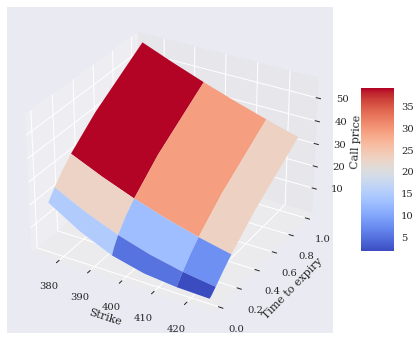

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, call, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Call price')
fig.colorbar(surf, shrink=0.5, aspect=5);